# Decision Tree Classifier (titanic)
### Author : MD. Mehedi Hassan Galib
### Date : 03 August, 2020

<br/>

<br/>

# Loading libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
import seaborn as sns

<br/>
<br/> 

## Getting dataset and Reconnaissance

In [3]:
df_train = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/kaggle/train.csv')
df_test = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/kaggle/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.drop(df_train[['PassengerId','Name','Ticket','Cabin']], axis = 1, inplace = True)
df_test.drop(df_test[['Name','Ticket','Cabin']], axis = 1, inplace = True)

<br/>
<br/> 

## Handling Missing Values

In [6]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [7]:
df_test = df_test.fillna(df_test.mean())

In [8]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [9]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
df_train = df_train.fillna(df_train.mean())

In [11]:
df1_train = df_train.fillna("S")

In [13]:
df1_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df1_test = df_test
df1_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


<br/>
<br/> 

## Converting to dummy variable

In [15]:
df2_train = pd.get_dummies(df1_train, columns = ['Sex','Embarked','Survived','Pclass'], drop_first = True)
df2_test = pd.get_dummies(df1_test, columns = ['Sex','Embarked','Pclass'], drop_first = True)

<br/>
<br/>

## Converting to DataFrame

In [17]:
X = pd.DataFrame(df2_train[['SibSp','Age','Fare','Parch','Sex_male','Embarked_Q','Embarked_S','Pclass_2','Pclass_3']])
y = pd.DataFrame(df2_train['Survived_1'])

In [18]:
X1 = pd.DataFrame(df2_test[['SibSp','Age','Parch','Fare','Sex_male','Embarked_Q','Embarked_S','Pclass_2','Pclass_3']])

<br/>
<br/>

## Model build up

In [19]:
cf = DecisionTreeClassifier(max_depth = 4)
model = cf.fit(X, y)

<br/>
<br/>

## Prediction

In [20]:
y1 = cf.predict(X1)
y1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [21]:
df2_test['Survived'] = list(y1)

In [22]:
df2_test.tail()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Survived
413,1305,30.27259,0,0,8.0500,1,0,1,0,1,0
414,1306,39.00000,0,0,108.9000,0,0,0,0,0,1
415,1307,38.50000,0,0,7.2500,1,0,1,0,1,0
416,1308,30.27259,0,0,8.0500,1,0,1,0,1,0
417,1309,30.27259,1,1,22.3583,1,0,0,0,1,0


In [23]:
df2_test.drop(df2_test[['SibSp','Age','Parch','Fare','Sex_male','Embarked_Q','Embarked_S','Pclass_2','Pclass_3']], axis = 1, inplace = True)

In [24]:
df2_test.style.hide_index()

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0


In [25]:
df2_test.to_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/kaggle/dt5.csv', index = False)

In [26]:
cf.score(X, y)

0.8417508417508418

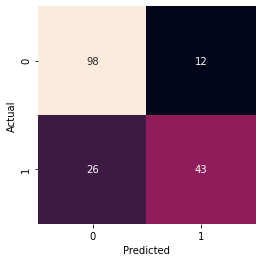

In [14]:
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<br/>
<br/>

## Decision tree

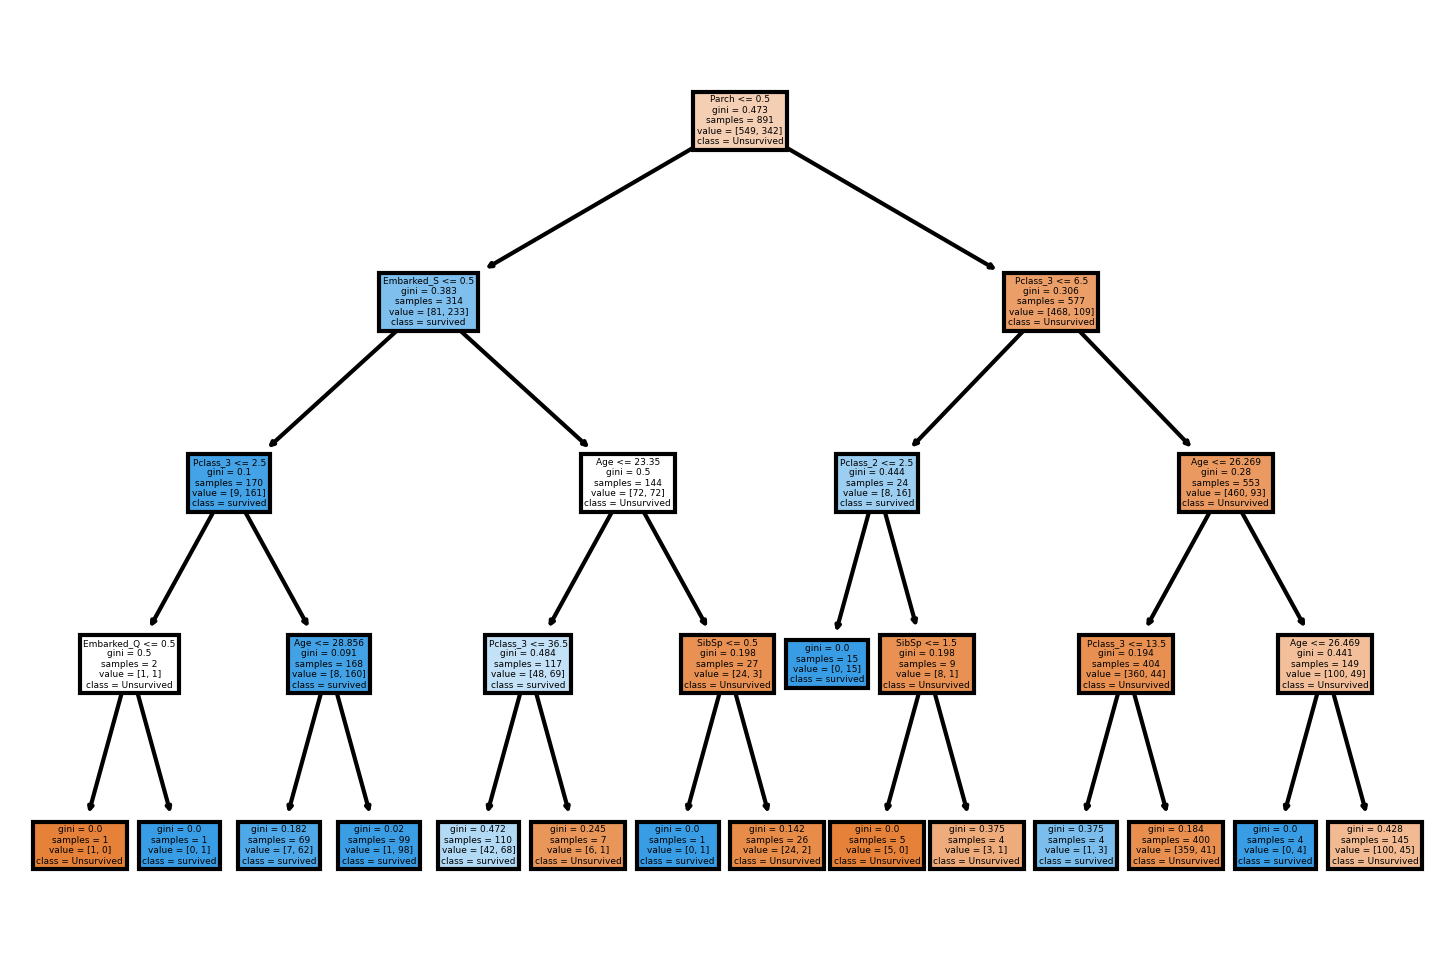

In [34]:
fn=['Pclass_2','Pclass_3','Age','SibSp', 'Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
cn=['Unsurvived', 'survived']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,4), dpi=300)
tree.plot_tree(cf,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()